In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv("properties_2016.csv")
data.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [4]:
data1 = data

In [5]:
all_features = list(data1.columns.values)
len(all_features)

58

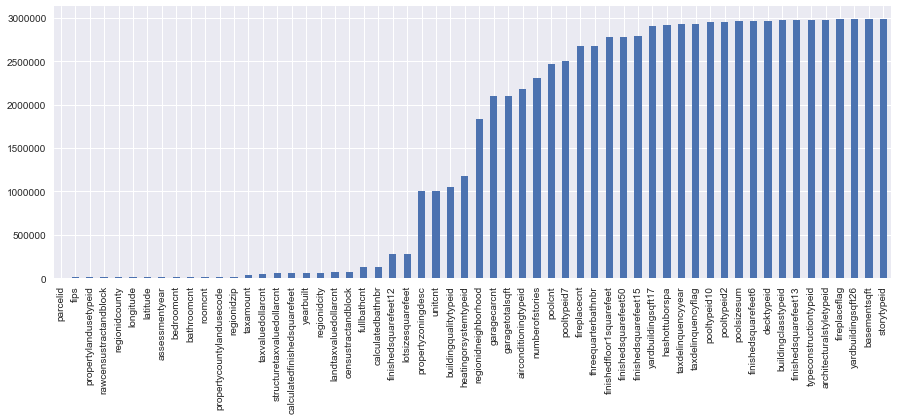

In [6]:
data1.isnull().sum().sort_values().plot.bar(figsize=(15,5))
plt.show()

In [7]:
features1 = []
for i in all_features:
    if data1[i].isnull().sum() < 500000:                #Considering features with less than 20% missing values of total records
            features1.append(i)
len(features1)

25

In [8]:
data2 = data1[features1]

In [9]:
data2.dtypes

parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
censustractandblock             float64


We can see that the is a feature propertycountylandusecode which is of object type. Thus for analysis purpose, it has to be converted into a catrgorical variable.

In [10]:
data2["propertycountylandusecode"].isnull().sum()

12277

Null values in a categorical variable must be filled in with a method other than the mean. Such as the Mode or Median.

In [11]:
data2["propertycountylandusecode"].fillna(data2["propertycountylandusecode"].mode()[0], inplace=True)

Converting object type to category type

In [12]:
data2["propertycountylandusecode"] = data2["propertycountylandusecode"].astype('category')

Since the entire dataset fas contineous variables, in order to perform linear regression, the categorical data must be encoded in a numerical format. This can be done with the following steps:

In [13]:
data2["propertycountylandusecode_encoded"] = data2["propertycountylandusecode"].cat.codes
del data2['propertycountylandusecode']
data2.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,...,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,propertycountylandusecode_encoded
0,10754147,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34144442.0,-118654084.0,...,96337.0,0.0,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,12
1,10759547,0.0,0.0,NaN,NaN,NaN,6037.0,NaN,34140430.0,-118625364.0,...,96337.0,0.0,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,10
2,10843547,0.0,0.0,NaN,73026.0,NaN,6037.0,NaN,33989359.0,-118394633.0,...,96095.0,0.0,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,150
3,10859147,0.0,0.0,NaN,5068.0,NaN,6037.0,NaN,34148863.0,-118437206.0,...,96424.0,0.0,1948.0,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,150
4,10879947,0.0,0.0,NaN,1776.0,NaN,6037.0,NaN,34194168.0,-118385816.0,...,96450.0,0.0,1947.0,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,162


In [14]:
data2.shape

(2985217, 25)

Now we can proceed with filling the missing values of a perticular column with the mean of the values of that perticular column.

In [24]:
columns = data2.columns
for col in columns:
    data2[col].fillna(data2[col].mean(), inplace=True)

## Reducing Dimensionality:

In [26]:
data2.assessmentyear.value_counts()

2015.000000    2972420
2014.999459      11439
2014.000000       1306
2012.000000         26
2004.000000          6
2013.000000          4
2003.000000          3
2001.000000          3
2010.000000          2
2009.000000          2
2005.000000          2
2016.000000          1
2011.000000          1
2002.000000          1
2000.000000          1
Name: assessmentyear, dtype: int64

Notice that assessmentyear has more than 95% of the values as 2015. Hence it cannot be used as a good predictor.

There are a few variables that almost seem to be similar. Such as, 'bathroomcnt' and 'calculatedbathnbr' seem to convey the same information. Let us find the correlation between them.

In [27]:
np.corrcoef(data2.bathroomcnt,data2.calculatedbathnbr)

array([[ 1.        ,  0.91001755],
       [ 0.91001755,  1.        ]])

In [38]:
columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'propertycountylandusecode_encoded'],
      dtype='object')

In [39]:
np.corrcoef(data2.taxvaluedollarcnt,data2.landtaxvaluedollarcnt)

array([[ 1.        ,  0.87253927],
       [ 0.87253927,  1.        ]])

In [42]:
np.corrcoef(data2.structuretaxvaluedollarcnt,data2.taxvaluedollarcnt)

array([[ 1.        ,  0.84335181],
       [ 0.84335181,  1.        ]])

In [43]:
np.corrcoef(data2.structuretaxvaluedollarcnt,data2.landtaxvaluedollarcnt)

array([[ 1.        ,  0.47518324],
       [ 0.47518324,  1.        ]])

In [49]:
np.corrcoef(data2.fullbathcnt,data2.calculatedbathnbr)

array([[ 1.        ,  0.98736017],
       [ 0.98736017,  1.        ]])

In [57]:
np.corrcoef(data2.finishedsquarefeet12,data2.calculatedfinishedsquarefeet)

array([[ 1.       ,  0.5131434],
       [ 0.5131434,  1.       ]])

In [44]:
# Deleting some Duplicate Columns
del data2['taxvaluedollarcnt']
del data2['assessmentyear']
del data2['bathroomcnt']

In [50]:
del data2['fullbathcnt']

In [51]:
data2.shape

(2985217, 21)

# TASK1: CORRELATION HEATMAP:

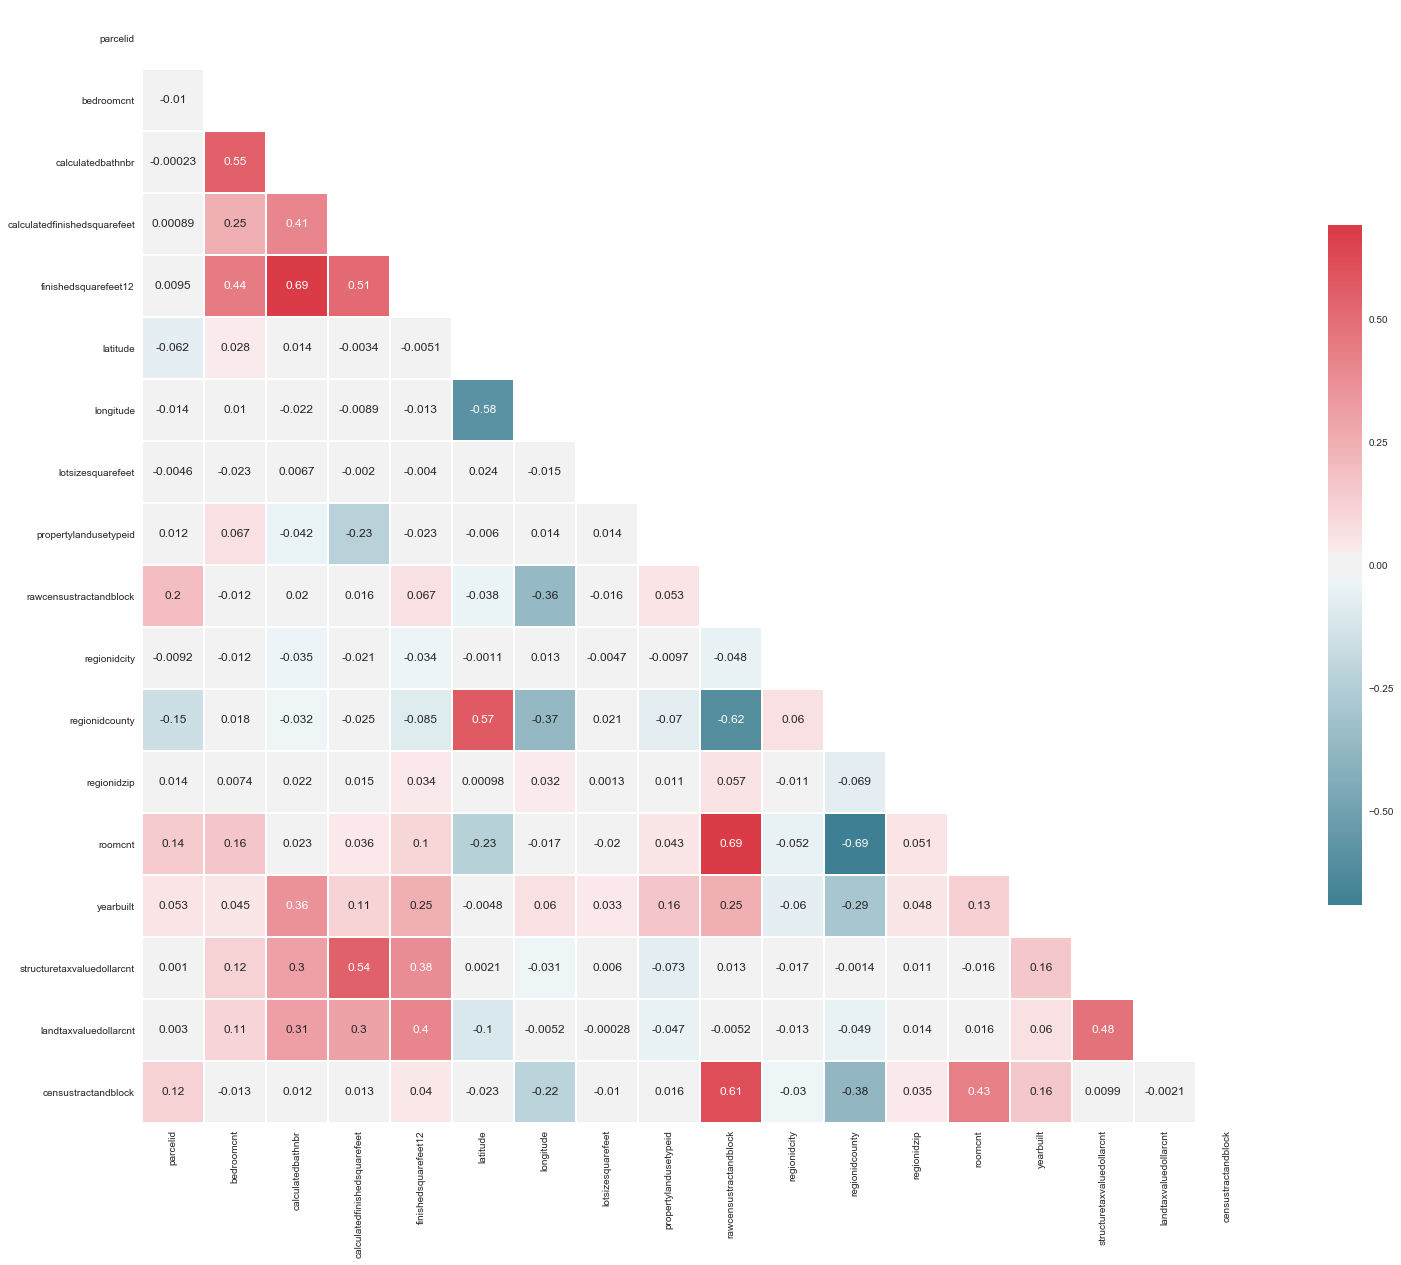

In [198]:
sns.set(style="white")
corr = data2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='0.2g')

plt.show()

Here we can see that there are a few more features that tend to have a strong correlation between them. Hence with careful monitoring, either one can be dropped from the dataset. Few more features that hold a strong relation between them are:<br>
rawcensustractandblock <-> fips<br>
taxamount <-> structuretaxvaluedollarcnt<br>
taxamount <-> landtaxvaluedollarcnt<br>
Also 'propertycountrylandusecode_endoded' also holds a strong correlation with many variables.

In [ ]:
del data2['fips']
del data2['taxamount']

In [61]:
del data2['propertycountylandusecode_encoded']

In [62]:
data2.shape

(2985217, 18)

In [64]:
train_data = pd.read_csv('train_2016_v2.csv')

In [65]:
train1 = data2.merge(train_data,on='parcelid',how='inner')

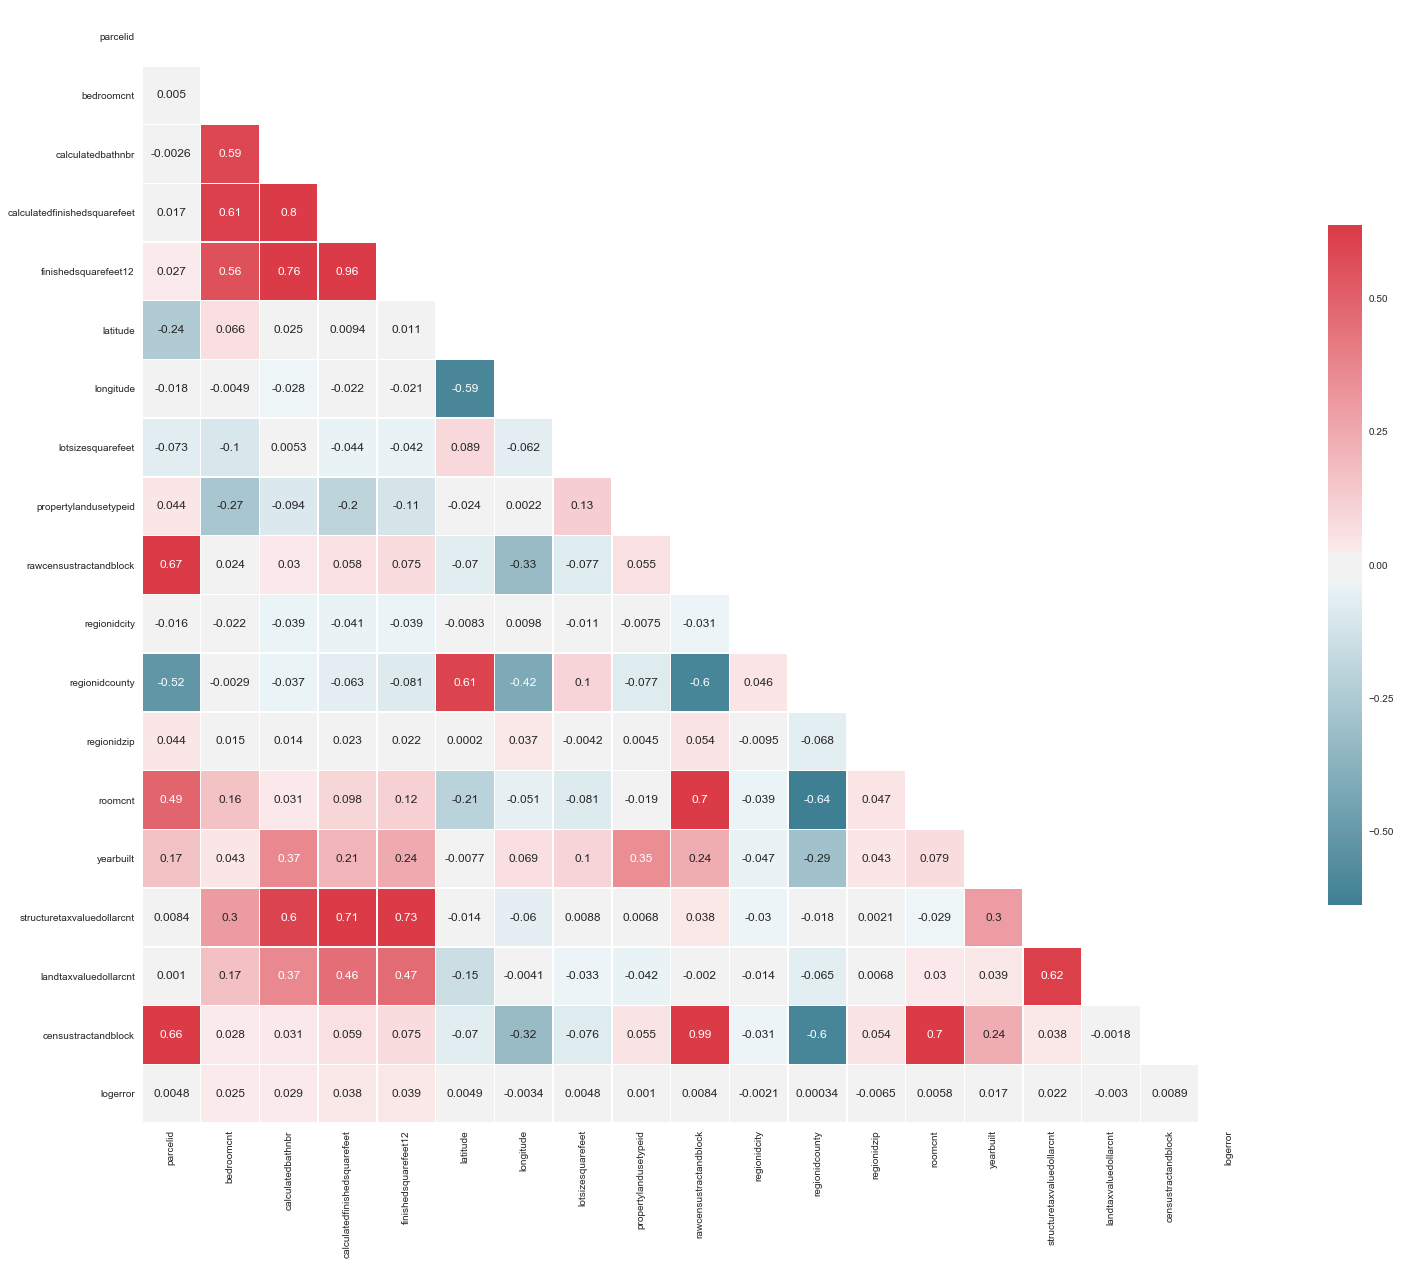

In [68]:
sns.set(style="white")
corr = train1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='0.2g')

plt.show()

Here we can see that there are a few more features that tend to have a strong correlation between them. Hence with careful monitoring, either one can be dropped from the dataset.<br>
** Its is important to understand that there are a few features whose correlation changes with the size of the dataset. For example, consider finishedsquarefeet12 and calculatedfinishedsquarefeet. In the original dataset, we see that the correlation between them is 0.51 but in the merged dataset, their correlation turns out to be 0.96 which is too high.** In such cases, it is not viable to delete these features from the dataset.

In [70]:
train1.shape

(90275, 20)

In [74]:
train1['transactiondate'] = pd.to_datetime(train1['transactiondate'])

In [75]:
train1.dtypes

parcelid                                 int64
bedroomcnt                             float64
calculatedbathnbr                      float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
latitude                               float64
longitude                              float64
lotsizesquarefeet                      float64
propertylandusetypeid                  float64
rawcensustractandblock                 float64
regionidcity                           float64
regionidcounty                         float64
regionidzip                            float64
roomcnt                                float64
yearbuilt                              float64
structuretaxvaluedollarcnt             float64
landtaxvaluedollarcnt                  float64
censustractandblock                    float64
logerror                               float64
transactiondate                 datetime64[ns]
dtype: object

# TASK 2 :  GRAPHS:

Let us plot a few graphs if we can find more patterns amoung our variables:

### 1) Relationship between roomcnt, calculatedbathnbr and bedroomcnt:

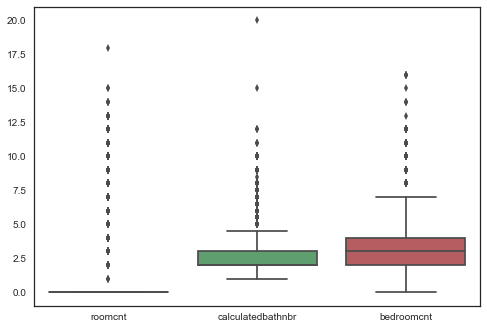

In [86]:
sns.boxplot(data = train1.loc[:,['roomcnt','calculatedbathnbr','bedroomcnt']])
plt.show()

'roomcnt' as per definition must give the total number of rooms in the principal residence. Hence, it is expected that 'roomcnt' will have higher mean when compared to 'calculatedbathnbr' and 'bedroomcnt'. But the box plot comparision shows that mean of the 'roomcnt' is near '0' which clearly states that the 'roomcnt' column is an inefficient column to use for making predictions and hence can be removed.

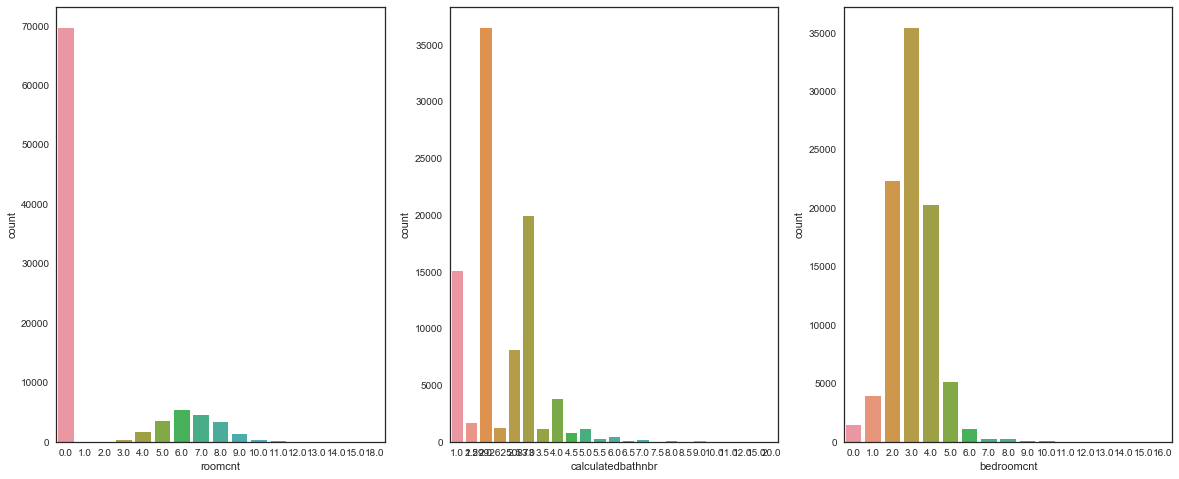

In [87]:
fig, ax = plt.subplots(1,3)
sns.countplot(train1.roomcnt, ax=ax[0])
sns.countplot(train1.calculatedbathnbr, ax=ax[1])
sns.countplot(train1.bedroomcnt, ax=ax[2])
fig.set_size_inches(20, 8)
plt.show()

### 2) Relationship between Absolute mean error and the month of transaction:

In [89]:
train1['transaction_month'] = pd.DatetimeIndex(train1['transactiondate']).month

In [90]:
abs_mean_logerror = pd.Series(abs(train1['logerror']).groupby(train1['transaction_month']).mean())

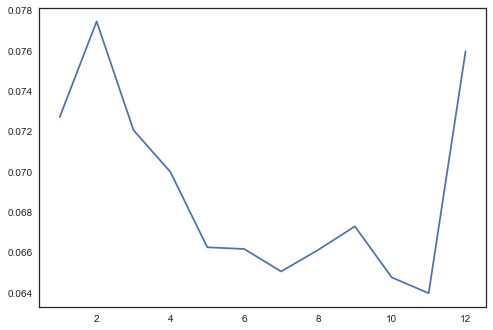

In [91]:
plt.plot(abs_mean_logerror.index,abs_mean_logerror.values)
plt.show()

We can observe that the error increases during the winter months and tends to decrease during the summer. Though it is hard to jusitfy this trend, let us try to find the relationship between months and the number of transactions per month.

### 3) Number of Transactions per month:

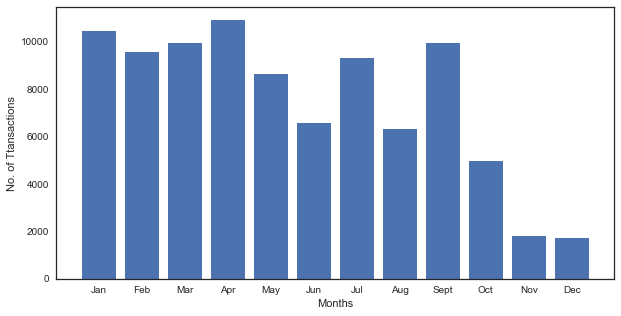

In [92]:
df1 = train1['transaction_month'].value_counts()
df2 = pd.DataFrame(df1,df1.index).reset_index().sort_values('index')

plt.figure(figsize=(10,5))
plt.bar(df2['index'],df2['transaction_month'])
labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]
plt.xticks(df2['index'], labels)
plt.xlabel('Months')
plt.ylabel('No. of Ttansactions')
plt.show()

We can now see that the number of transactions are less during the winter season. A possible justification for the high absolute mean log error during winters can be that there are fewer number of transactions during the winters so the zestimate model learned less from the limited transactions in the winter. Hence, there is a relatively higher mean absoulte logerror during the months where the number of transactions are less.

### 4) Relationship between mean absolute logerror and the year the house was built:

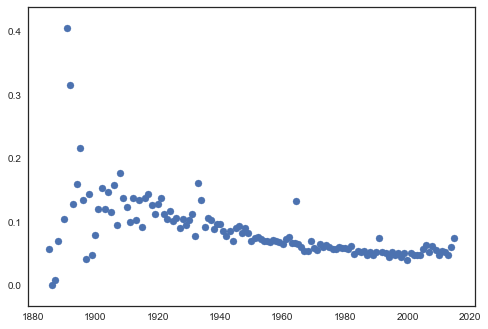

In [93]:
s1 = train1.yearbuilt.value_counts()
df1 = pd.DataFrame({'yearbuilt':s1.index, 'count':s1.values})

s2 = abs(train1['logerror']).groupby(train1['yearbuilt']).mean()
df2 = pd.DataFrame({'yearbuilt':s2.index, 'mean_abs_logerror':s2.values})

df3 = pd.merge(df1, df2, on='yearbuilt', how='inner')
df3.sort_values('yearbuilt', inplace=True)

plt.scatter(df3.yearbuilt,df3.mean_abs_logerror)
plt.show()

Here we can see that the mean absolute log error decreases with the increase in year. This could mean that the predictions were better for the newly built houses than the older ones. But, there can be other reason behind this too. There can be a case where we may have less number of houses that were built in the past and more number of houses built a little ahead in time. Hence the model might not be able to learn more from the old houses and could not predict accurately. Let us check for the number of houses built each year.

### 5) Number of houses built in an year:

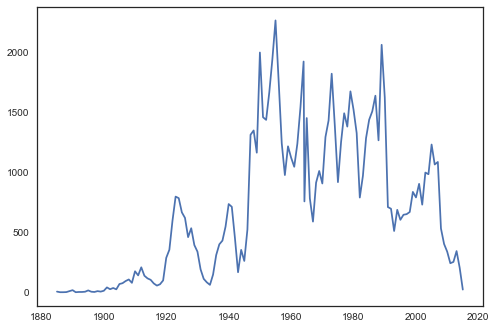

In [94]:
plt.plot(df3.yearbuilt,df3["count"])
plt.show()

We do notice that there are relatively less number of houses that were built in the past (say before 1945). Thus the model is succeptable to have a greater absolute mean error in this phase of time.

### Analyzing properties of logerror:

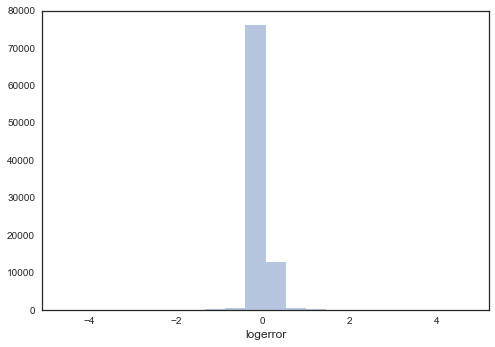

In [96]:
log_error = train1['logerror']
sns.distplot(log_error, bins=20, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.show()

<p>The histogram for log error looks zoomed out. This might be a result of having some outliers in the log error values. Let us check for outliers. </p>

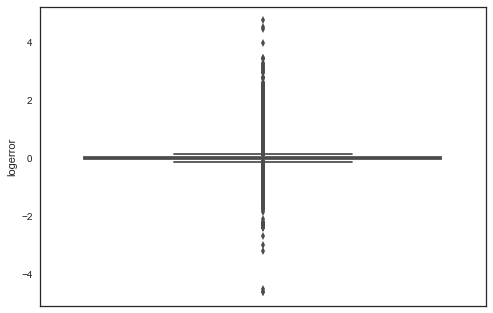

In [97]:
sns.boxplot(y=log_error)
plt.show()

<p>Looks like box plot is unable to find the outliers because may be we have the majority of the data in the spread close to zero. Hence we will have to look for another graph to detect outliers.</p>

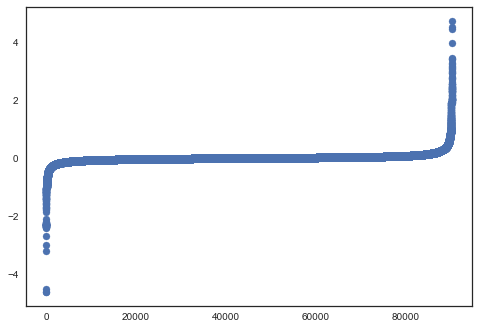

In [98]:
plt.scatter(range(len(log_error)), np.sort(log_error))
plt.show()

<p>We can now see that there are a few values that are greater than 4 and a few are also less than -4. Hence the histogram looked zoomed out trying to cover all the range of log_error. Let us replot the histogram after treating the outliers.</p>

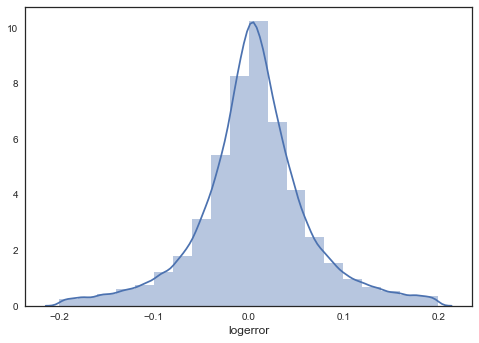

In [99]:
sns.distplot(log_error[log_error.between(-0.2,0.2)], bins=20)
plt.xlabel('logerror', fontsize=12)
plt.show()

<p>Now we can see that logerror seem to follow a normal distribution which is a good sign as the target variable must be normally distributed to help the model learn properly.</p>

#### Let us load the dataset into a csv file to avoid performing the preprocessing steps again.

In [106]:
filename = 'final_dataset.csv'
data2.to_csv(filename, index=False)

In [107]:
final_data = pd.read_csv('final_dataset.csv')
final_data.head()

,parcelid,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,censustractandblock
0,10754147,0.0,2.299263,1827.162124,1760.000608,34144442.0,-118654084.0,85768.0,269.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1964.261641,170883.577166,9.0,6.048431e+13
1,10759547,0.0,2.299263,1827.162124,1760.000608,34140430.0,-118625364.0,4083.0,261.0,6.037800e+07,37688.0,3101.0,96337.0,0.0,1964.261641,170883.577166,27516.0,6.048431e+13
2,10843547,0.0,2.299263,73026.000000,1760.000608,33989359.0,-118394633.0,63085.0,47.0,6.037703e+07,51617.0,3101.0,96095.0,0.0,1964.261641,650756.000000,762631.0,6.048431e+13
3,10859147,0.0,2.299263,5068.000000,1760.000608,34148863.0,-118437206.0,7521.0,47.0,6.037141e+07,12447.0,3101.0,96424.0,0.0,1948.000000,571346.000000,585488.0,6.048431e+13
4,10879947,0.0,2.299263,1776.000000,1760.000608,34194168.0,-118385816.0,8512.0,31.0,6.037123e+07,12447.0,3101.0,96450.0,0.0,1947.000000,193796.000000,239695.0,6.048431e+13


In [109]:
train_2016 = pd.read_csv('train_2016_v2.csv')

In [110]:
training_data = final_data.merge(train_2016,on='parcelid',how='inner')
training_data.head()

,parcelid,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,censustractandblock,logerror,transactiondate
0,17073783,3.0,2.5,1264.0,1264.0,34303597.0,-119287236.0,1735.000000,265.0,6.111002e+07,34543.0,2061.0,97081.0,5.0,1986.0,115087.0,76724.0,6.111002e+13,0.0953,2016-01-27
1,17088994,2.0,1.0,777.0,777.0,34272866.0,-119198911.0,22822.805528,266.0,6.111002e+07,34543.0,2061.0,97083.0,4.0,1990.0,143809.0,95870.0,6.111002e+13,0.0198,2016-03-30
2,17100444,3.0,2.0,1101.0,1101.0,34340801.0,-119079610.0,6569.000000,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1956.0,33619.0,14234.0,6.111001e+13,0.0060,2016-05-27
3,17102429,2.0,1.5,1554.0,1554.0,34354313.0,-119076405.0,7400.000000,261.0,6.111001e+07,26965.0,2061.0,97113.0,5.0,1965.0,45609.0,17305.0,6.111001e+13,-0.0566,2016-06-07
4,17109604,4.0,2.5,2415.0,2415.0,34266578.0,-119165392.0,6326.000000,261.0,6.111001e+07,34543.0,2061.0,97084.0,8.0,1984.0,277000.0,277000.0,6.111001e+13,0.0573,2016-08-08


# Task 3: Simple Linear Regression:

### Splitting Data for Train and Test sets:

In [112]:
X = training_data[training_data.columns.difference(['parcelid','logerror','transactiondate'])]
y = training_data['logerror']

In [116]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [127]:
final_test_data = final_data[final_data.columns.difference(['parcelid'])]

## Simple Linear Regression:

In [117]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
pred_regr = regr.predict(X_test)

In [119]:
regr.score(X,y)

0.002355318663799455

In [121]:
print("Calculate MSE with X_train, Y_train:", np.mean((y_train - regr.predict(X_train)) ** 2))
print("Calculate MSE with X_test, Y_test:", np.mean((y_test - regr.predict(X_test)) ** 2))

Calculate MSE with X_train, Y_train: 0.026048593834587717
Calculate MSE with X_test, Y_test: 0.025230586890254952


In [122]:
n = pd.DataFrame(y_test)
n['predicted_logerror'] = pred_regr
log_error = n['logerror']
p_log_error = n['predicted_logerror']

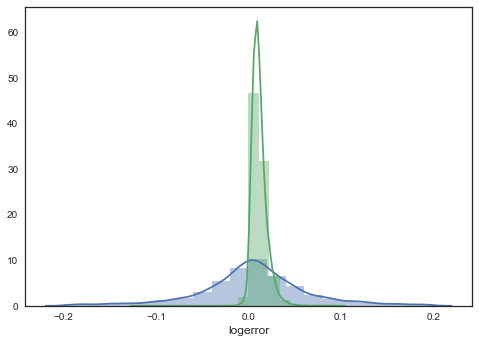

In [123]:
sns.distplot(log_error[log_error.between(-0.2,0.2)], bins=20)
sns.distplot(p_log_error[p_log_error.between(-0.2,0.2)], bins=20)
plt.xlabel('logerror', fontsize=12)
plt.show()

Predicting for the actual dataset:

In [128]:
pred_final_regr = regr.predict(final_test_data)

In [133]:
submit_data = pd.DataFrame({'ParcelId': final_data.parcelid, '201610':pd.Series(pred_final_regr), 
                            '201611': pd.Series(pred_final_regr), '201612':pd.Series(pred_final_regr), 
                            '201710': pd.Series(pred_final_regr), '201711':pd.Series(pred_final_regr),
                            '201712':pd.Series(pred_final_regr)})

In [134]:
submit_data = submit_data[['ParcelId', '201610','201611','201612','201710','201711','201712']]

In [135]:
submit_data.to_csv("linear_reg_submit.gz", index=False, float_format='%.4f', compression='gzip')

# Task 4,5 : Advance Model and Sample_Submission:
Let us fine tune our features by running an Extra Tree Regressor to generate the feature importance:

In [136]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn import ensemble

# load the iris datasets
#dataset = train1
dataset = training_data[training_data.columns.difference(['parcelid','logerror','transactiondate'])]
target = training_data["logerror"].values
# fit an Extra Trees model to the data
model = ensemble.ExtraTreesRegressor()
model.fit(dataset,target)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.04258908  0.03584363  0.08347105  0.0385255   0.07492803  0.11489262
  0.08194442  0.0747441   0.09258943  0.01894214  0.03906442  0.03687244
  0.00244793  0.0506905   0.01465151  0.1128379   0.0849653 ]


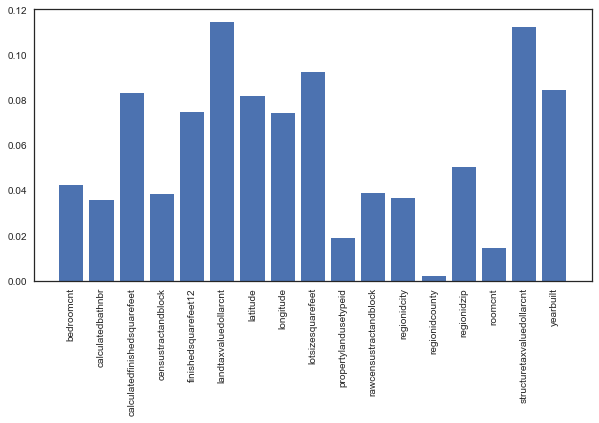

In [137]:
plt.figure(figsize=(10,5))
plt.bar(np.array(range(0,len(model.feature_importances_))), model.feature_importances_)
labels = dataset.columns
plt.xticks(np.array(range(0,len(model.feature_importances_))), labels, rotation=90)
#plt.xlabel('Months')
#plt.ylabel('No. of Ttansactions')
plt.show()

We can now see the most important features amoung our shortlisted features. Let us consider the most significant features in our final dataset.
Let us proceed with the following as the final features in our dataset. However, we can come back to this point and adjust the features to further improve our model efficiency.<br>

In [143]:
final_features = ['parcelid','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','lotsizesquarefeet',
                  'calculatedfinishedsquarefeet','yearbuilt','latitude','longitude',
                 'finishedsquarefeet12']

In [144]:
final_dataset_imp_features = final_data[final_features]

In [145]:
training_data_imp_features = final_dataset_imp_features.merge(train_2016,on='parcelid',how='inner')
training_data_imp_features.head()

,parcelid,landtaxvaluedollarcnt,structuretaxvaluedollarcnt,lotsizesquarefeet,calculatedfinishedsquarefeet,yearbuilt,latitude,longitude,finishedsquarefeet12,logerror,transactiondate
0,17073783,76724.0,115087.0,1735.000000,1264.0,1986.0,34303597.0,-119287236.0,1264.0,0.0953,2016-01-27
1,17088994,95870.0,143809.0,22822.805528,777.0,1990.0,34272866.0,-119198911.0,777.0,0.0198,2016-03-30
2,17100444,14234.0,33619.0,6569.000000,1101.0,1956.0,34340801.0,-119079610.0,1101.0,0.0060,2016-05-27
3,17102429,17305.0,45609.0,7400.000000,1554.0,1965.0,34354313.0,-119076405.0,1554.0,-0.0566,2016-06-07
4,17109604,277000.0,277000.0,6326.000000,2415.0,1984.0,34266578.0,-119165392.0,2415.0,0.0573,2016-08-08


In [146]:
X = training_data_imp_features[training_data_imp_features.columns.difference(['parcelid','logerror','transactiondate'])]
y = training_data_imp_features['logerror']

In [147]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [163]:
final_test_data = final_dataset_imp_features[final_dataset_imp_features.columns.difference(['parcelid'])]

### First let us check if the LinearRegression Model improves its predictions with these new set of important features:

In [164]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
pred_regr = regr.predict(X_test)

In [166]:
regr.score(X,y)

0.0021146294481055872

In [167]:
print("Calculate MSE with X_train, Y_train:", np.mean((y_train - regr.predict(X_train)) ** 2))
print("Calculate MSE with X_test, Y_test:", np.mean((y_test - regr.predict(X_test)) ** 2))

Calculate MSE with X_train, Y_train: 0.025675727339559477
Calculate MSE with X_test, Y_test: 0.026753277607221904


In [168]:
n = pd.DataFrame(y_test)
n['predicted_logerror'] = pred_regr
log_error = n['logerror']
p_log_error = n['predicted_logerror']

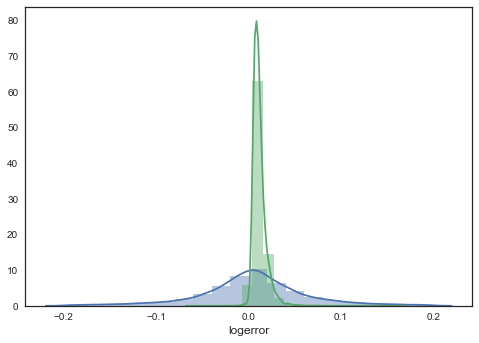

In [169]:
sns.distplot(log_error[log_error.between(-0.2,0.2)], bins=20)
sns.distplot(p_log_error[p_log_error.between(-0.2,0.2)], bins=20)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [170]:
pred_final_regr = regr.predict(final_test_data)

In [171]:
submit_data = pd.DataFrame({'ParcelId': final_data.parcelid, '201610':pd.Series(pred_final_regr), 
                            '201611': pd.Series(pred_final_regr), '201612':pd.Series(pred_final_regr), 
                            '201710': pd.Series(pred_final_regr), '201711':pd.Series(pred_final_regr),
                            '201712':pd.Series(pred_final_regr)})

In [172]:
submit_data = submit_data[['ParcelId', '201610','201611','201612','201710','201711','201712']]

In [173]:
submit_data.to_csv("linear_reg_imp_feat_submit.gz", index=False, float_format='%.4f', compression='gzip')

We can observe that the mean square reduces a little but not by a significant amount. The R-squared value almost remains the same. Lets try another model.

## K-Nearest Neighbours:

In [150]:
from sklearn.neighbors import KNeighborsRegressor

K-NN with 2  Neighbours


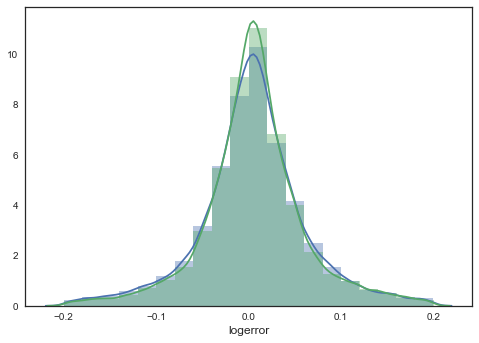

Train R^2: 0.500852248289
Test R^2: -0.382079141666


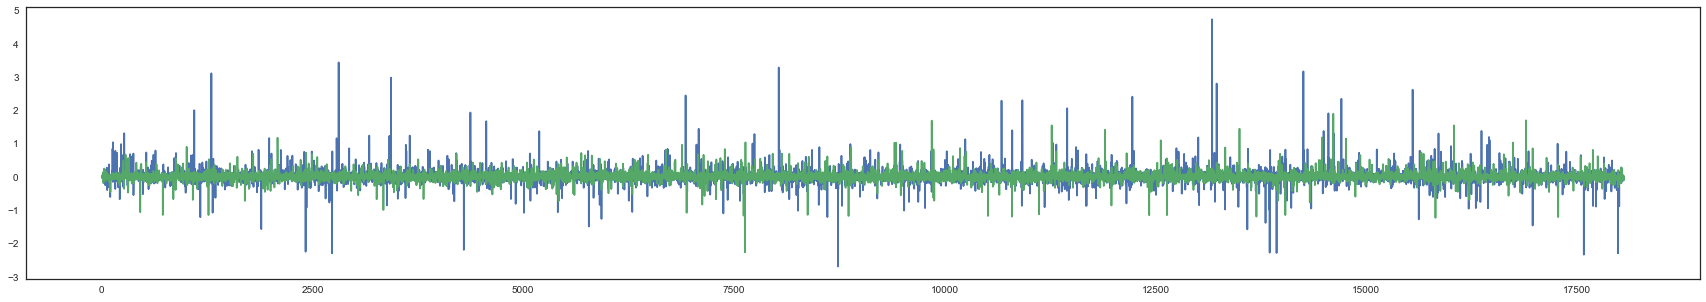

K-NN with 10  Neighbours


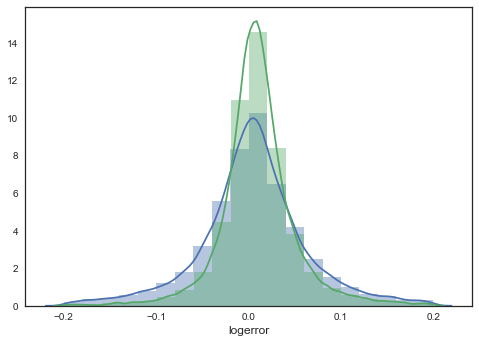

Train R^2: 0.114656320471
Test R^2: -0.0744194065107


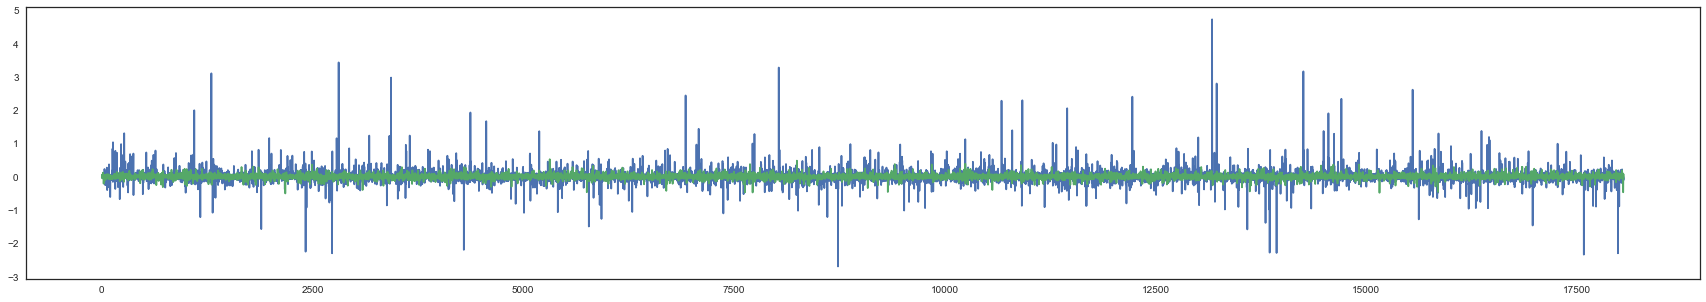

K-NN with 20  Neighbours


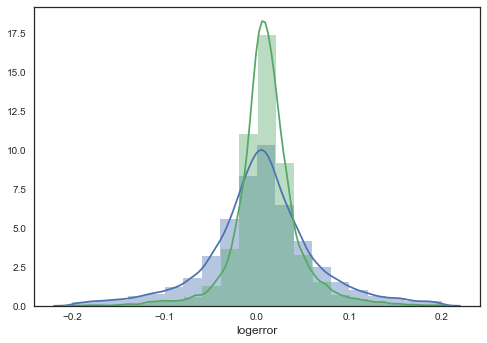

Train R^2: 0.0596420537352
Test R^2: -0.0370770922406


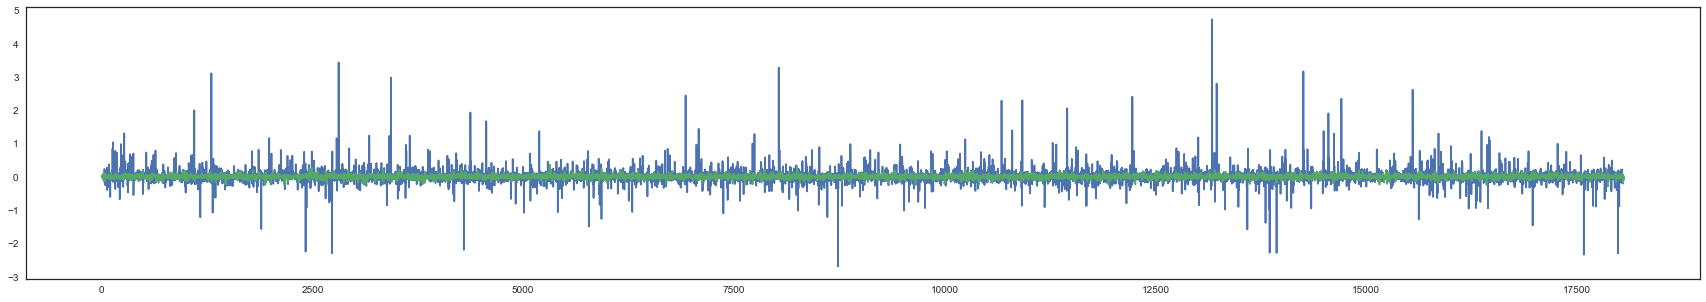

K-NN with 50  Neighbours


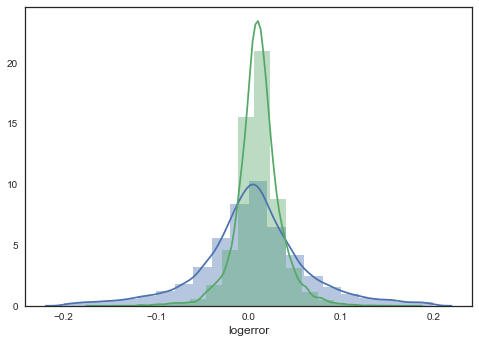

Train R^2: 0.0290510784579
Test R^2: -0.00694295517174


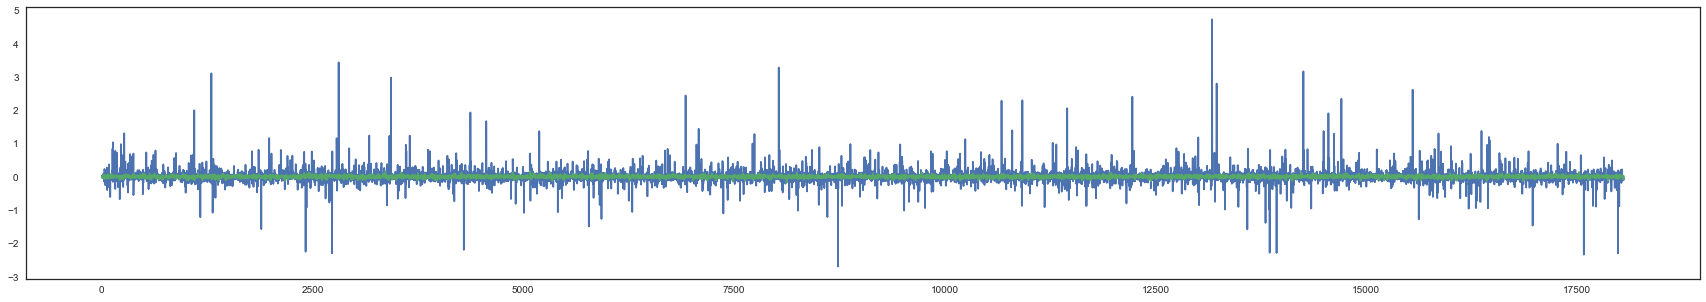

In [154]:
for i in [2,10,20,50]:
    print("K-NN with",i," Neighbours")
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred = neigh.predict(X_test)
    n = pd.DataFrame({'y_test':y_test, 'predicted':pred})

    log_error = n['y_test']
    p_log_error = n['predicted']
    sns.distplot(log_error[log_error.between(-0.2,0.2)], bins=20)
    sns.distplot(p_log_error[p_log_error.between(-0.2,0.2)], bins=20)
    plt.xlabel('logerror', fontsize=12)
    plt.show()
    
    print("Train R^2:",neigh.score(X_train, y_train))
    print("Test R^2:",neigh.score(X_test, y_test))
    
    plt.figure(figsize=(30,5))
    plt.plot(np.array(range(len(log_error))),log_error)
    plt.plot(np.array(range(len(log_error))),p_log_error)
    plt.show()

We can clearly notice that as the 'K' value increases, the prediction (green line) closes to zero. Which is not appropriate. Hence we will go with the model where K=2 for now.

In [157]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 
pred_neigh = neigh.predict(final_test_data)

In [160]:
submit_data = pd.DataFrame({'ParcelId': final_data.parcelid, '201610':pd.Series(pred_neigh), 
                            '201611': pd.Series(pred_neigh), '201612':pd.Series(pred_neigh), 
                            '201710': pd.Series(pred_neigh), '201711':pd.Series(pred_neigh),
                            '201712':pd.Series(pred_neigh)})

In [161]:
submit_data = submit_data[['ParcelId', '201610','201611','201612','201710','201711','201712']]

In [162]:
submit_data.to_csv("knn_k2_submit.gz", index=False, compression='gzip', float_format='%.4f')

## Decision Tree Regressor:

In [175]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [179]:
dt1 = tree.DecisionTreeRegressor(max_depth=15)
dt1 = dt1.fit(X_train, y_train)
pred = dt1.predict(X_test)
dt1.score(X_test,y_test)

-0.21096958866640958

In [187]:
dt2 = tree.DecisionTreeRegressor(max_depth=5)
dt2 = dt2.fit(X_train, y_train)
pred = dt2.predict(X_test)
dt2.score(X_test,y_test)

-0.047764493473862579

We can see that the r-squared value turns out to be negative and with a minimum depth closes to zero but still is not sufficient. Hence, we may conclude that decision tree regressor may not be a good model for this type of a problem.

In [188]:
cross_val_score(dt1, X_train, y_train, cv=10)

array([-0.24197635, -0.13366503, -0.16948803, -0.17963469, -0.10957157,
       -0.21913772, -0.11955841, -0.14539468, -0.13052905, -0.1435272 ])

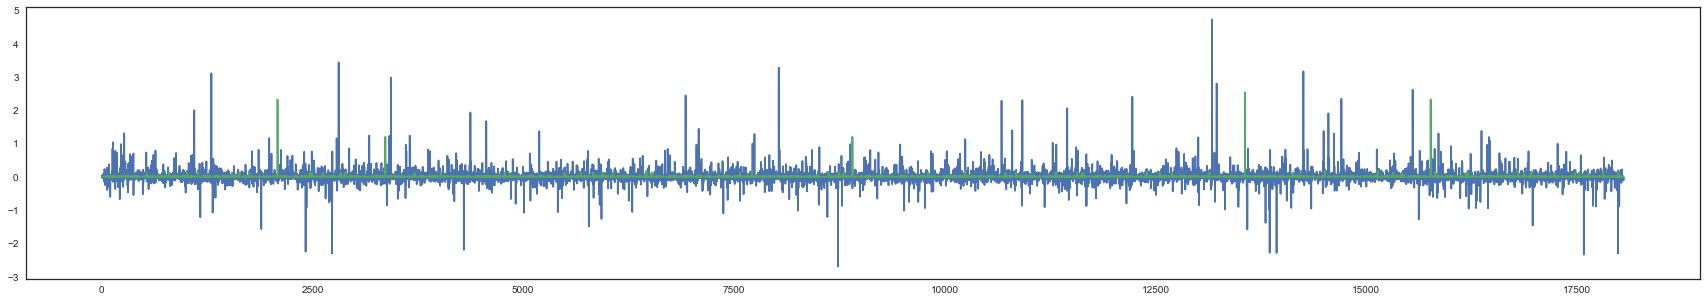

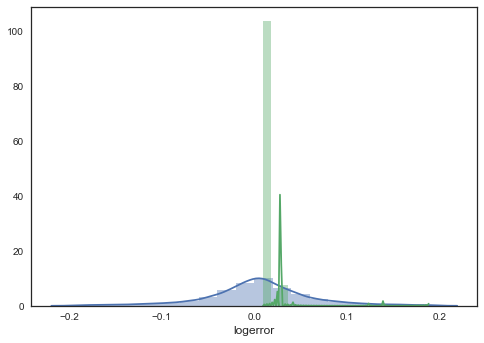

In [189]:
plt.figure(figsize=(30,5))
plt.plot(np.array(range(len(y_test))),y_test)
plt.plot(np.array(range(len(y_test))),pred)
plt.show()

n = pd.DataFrame({'y_test':y_test, 'predicted':pred})
log_error = n['y_test']
p_log_error = n['predicted']
sns.distplot(log_error[log_error.between(-0.2,0.2)], bins=20)
sns.distplot(p_log_error[p_log_error.between(-0.2,0.2)], bins=20)
plt.xlabel('logerror', fontsize=12)
plt.show()

In [190]:
pred_dt = dt2.predict(final_test_data)

In [192]:
submit_data = pd.DataFrame({'ParcelId': final_dataset_imp_features.parcelid,
                     '201610':pd.Series(pred_dt),
                     '201611': pd.Series(pred_dt),
                     '201612':pd.Series(pred_dt),
                     '201710': pd.Series(pred_dt),
                     '201711':pd.Series(pred_dt),
                    '201712':pd.Series(pred_dt)})
submit_data = submit_data[['ParcelId', '201610','201611','201612','201710','201711','201712']]
submit_data.to_csv("dt5_submit.gz", index=False, float_format='%.4f', compression='gzip')

## Random Forest:

In [193]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=15,min_samples_split=10)

forest.fit(X_train, y_train)
pred_rf = forest.predict(final_test_data)

In [197]:
forest.score(X,y)

0.096468092208340517

In [194]:
submit_data = pd.DataFrame({'ParcelId': final_dataset_imp_features.parcelid,
                     '201610':pd.Series(pred_rf),
                     '201611': pd.Series(pred_rf),
                     '201612':pd.Series(pred_rf),
                     '201710': pd.Series(pred_rf),
                     '201711':pd.Series(pred_rf),
                    '201712':pd.Series(pred_rf)})

In [196]:
submit_data = submit_data[['ParcelId', '201610','201611','201612','201710','201711','201712']]
submit_data.to_csv("randomforestd15_submit.gz", index=False, float_format='%.4f', compression='gzip')

# Kaggle Score Statistics:

<table align='left'>
<tr>
<td><strong>Model</strong></td><td><strong>Score</strong></td><td><strong>Rank</strong></td>
</tr>
<tr>
<td>Linear Regression (Important Features)</td><td>0.0649506</td><td>2165</td>
</tr>
<tr>
<td>Linear Regression (Baseline Model)</td><td>0.0649925</td><td>2240</td>
</tr>
<tr>
<td>DecisionTreeRegressor, depth=5</td><td>0.0650787</td><td>No Improvement</td>
</tr>
<tr>
<td>Random Forest, depth=15</td><td>0.0660375</td><td>No Improvement</td>
</tr>
<tr>
<td>K-nn, K=2</td><td>0.0944037</td><td>No Improvement</td>
</tr>

</table>